In [1]:
# for downloading dataset and perform an operation & data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#for prediction
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.metrics import confusion_matrix

In [4]:
# loading dataset
df=pd.read_csv('C:/Users/SONY/Documents/CSV_Files/stock_price.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,29/06/2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,30/06/2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,01/07/2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,02/07/2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,06/07/2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,28/01/2020,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,29/01/2020,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,30/01/2020,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,31/01/2020,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [5]:
# to show first 5 rows
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29/06/2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30/06/2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01/07/2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02/07/2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06/07/2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [6]:
df.shape

(2416, 7)

In [7]:
# for statistical summary
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [8]:
# for overall information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


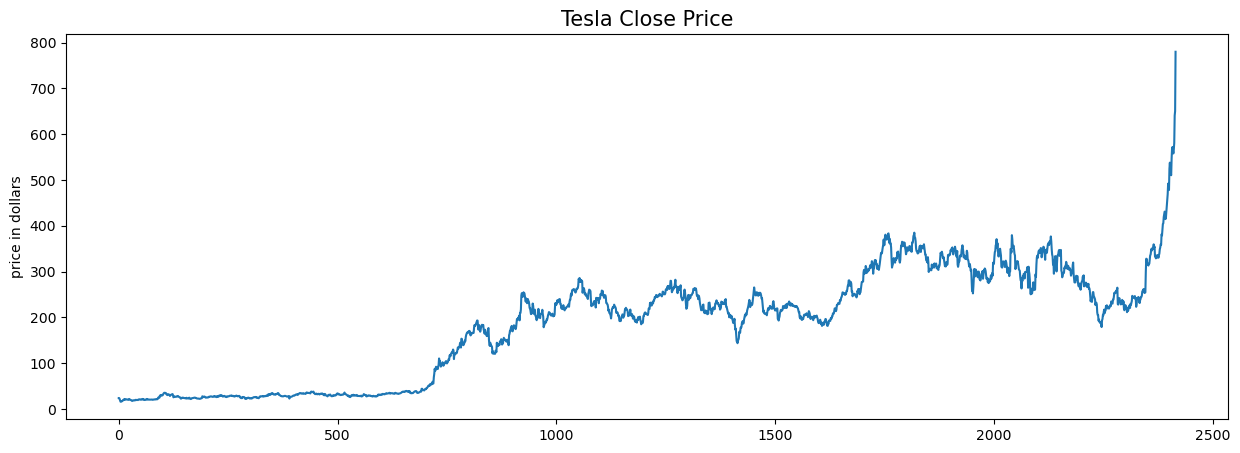

In [9]:
# for analysisof  the 'close' attributes in visualization form  
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close Price' , fontsize=15)
plt.ylabel('price in dollars')
plt.show()

In [10]:
df[df['Close']==df['Adj Close']].shape

(2416, 7)

In [11]:
# as 'close' and 'Adj close' colums are similar , we have to remove redundancy.
df=df.drop(['Adj Close'],axis=1)

In [12]:
df.head()

,Date,Open,High,Low,Close,Volume
0,29/06/2010,19.000000,25.00,17.540001,23.889999,18766300
1,30/06/2010,25.790001,30.42,23.299999,23.830000,17187100
2,01/07/2010,25.000000,25.92,20.270000,21.959999,8218800
3,02/07/2010,23.000000,23.10,18.709999,19.200001,5139800
4,06/07/2010,20.000000,20.00,15.830000,16.110001,6866900


In [13]:
# checking if null values is present or not in thae given dataset
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

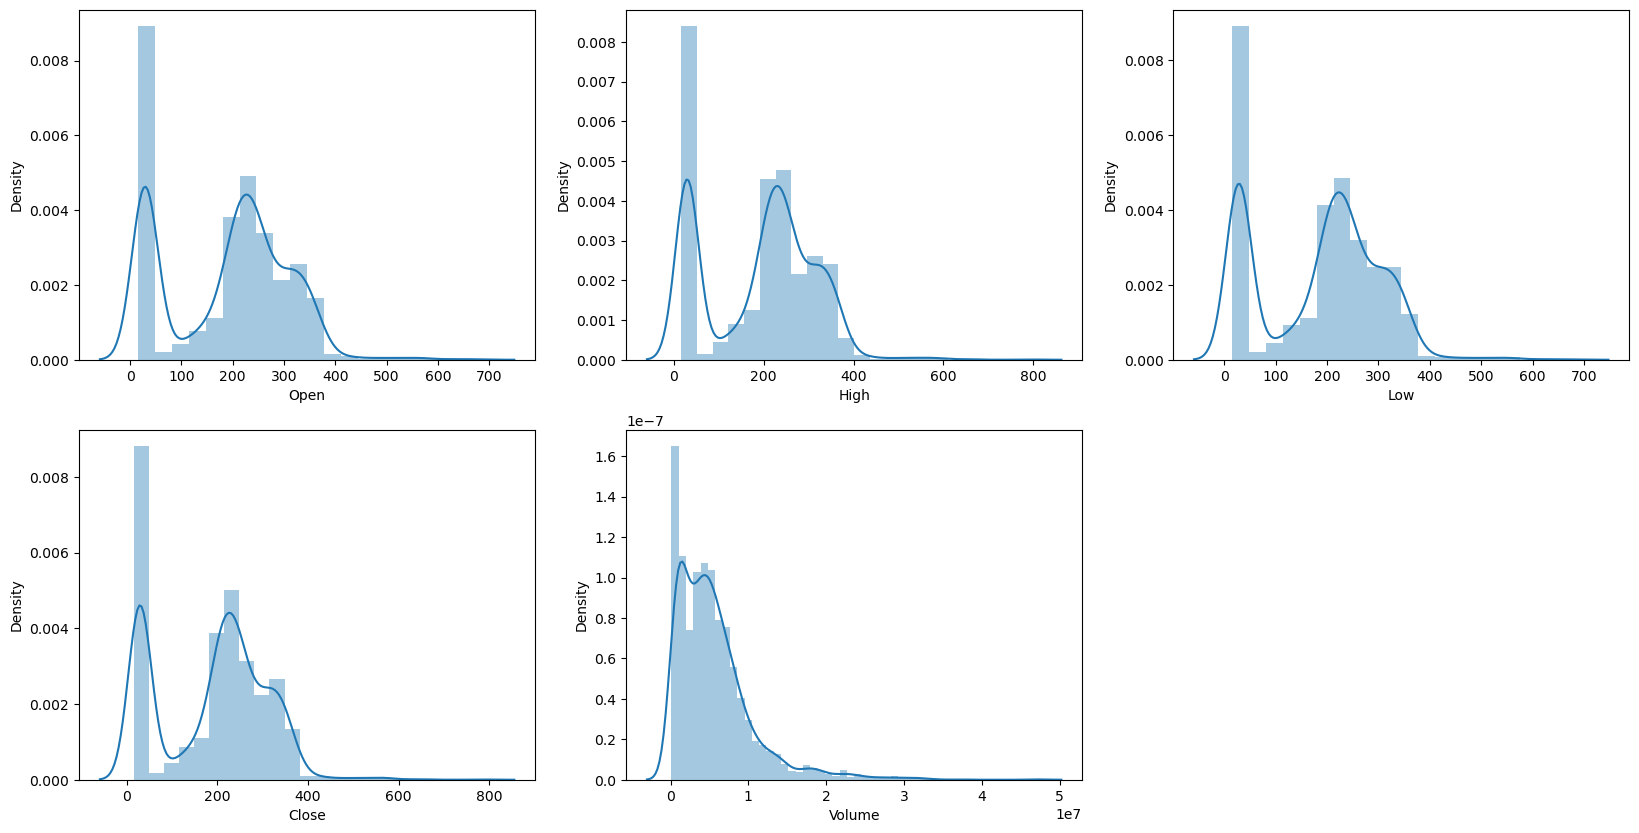

In [14]:
# select features for analysis from dataset
features=['Open','High','Low','Close','Volume']

# for visualization every features
plt.subplots(figsize=(20,10))
for i ,col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()

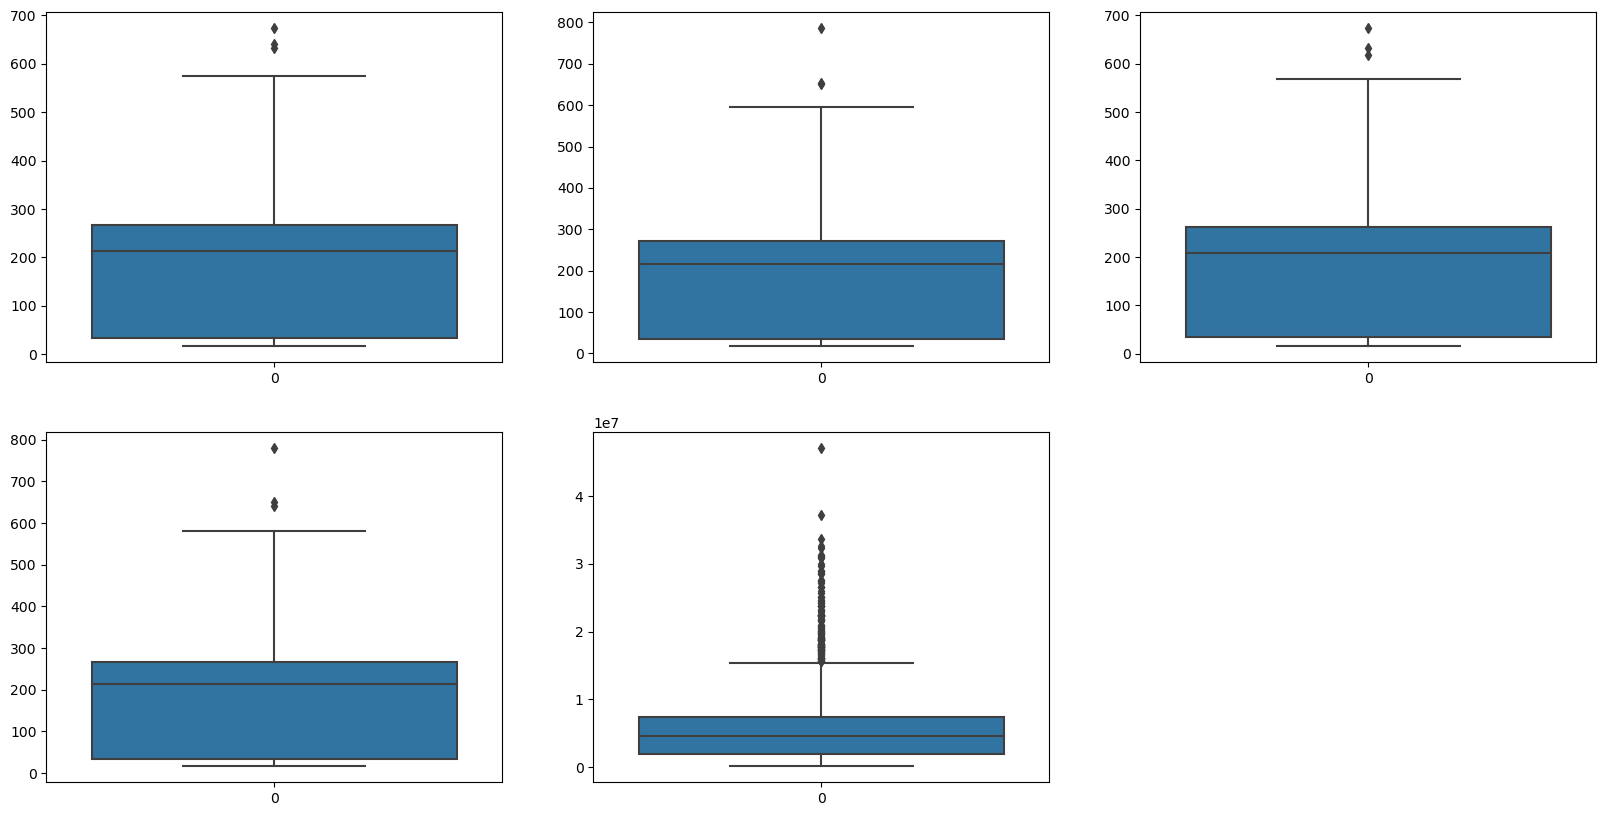

In [15]:
features=['Open','High','Low','Close','Volume']

# for checking outliers
plt.subplots(figsize=(20,10))
for i ,col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
plt.show()

In [16]:
# plitting the 'date' attributes into day, month, year for getting month analysis
splitted= df['Date'].str.split('/',expand=True)
df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,29/06/2010,19.000000,25.00,17.540001,23.889999,18766300,6,29,2010
1,30/06/2010,25.790001,30.42,23.299999,23.830000,17187100,6,30,2010
2,01/07/2010,25.000000,25.92,20.270000,21.959999,8218800,7,1,2010
3,02/07/2010,23.000000,23.10,18.709999,19.200001,5139800,7,2,2010
4,06/07/2010,20.000000,20.00,15.830000,16.110001,6866900,7,6,2010


In [17]:
# for getting 'is_quarterd_end' attributes which is the eesential variables for projects
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,29/06/2010,19.000000,25.00,17.540001,23.889999,18766300,6,29,2010,0
1,30/06/2010,25.790001,30.42,23.299999,23.830000,17187100,6,30,2010,1
2,01/07/2010,25.000000,25.92,20.270000,21.959999,8218800,7,1,2010,0
3,02/07/2010,23.000000,23.10,18.709999,19.200001,5139800,7,2,2010,0
4,06/07/2010,20.000000,20.00,15.830000,16.110001,6866900,7,6,2010,1


In [18]:
# gruoping the dataset by year
data_grouped=df.groupby('year').mean()
data_grouped

,Open,High,Low,Close,Volume,day,month,is_quarter_end
year,,,,,,,,
2010,23.408000,24.077231,22.646077,23.341846,1.579762e+06,9.453846,16.030769,0.330769
2011,26.821984,27.380238,26.194167,26.804762,1.290615e+06,6.547619,15.634921,0.317460
2012,31.203120,31.809160,30.545880,31.168600,1.229796e+06,6.500000,15.776000,0.336000
2013,104.416428,106.853016,101.779881,104.401230,8.407722e+06,6.543651,15.650794,0.321429
2014,223.415397,227.449881,219.206111,223.329088,6.913973e+06,6.551587,15.761905,0.333333
2015,229.831944,233.381666,226.270635,230.042898,4.318325e+06,6.567460,15.750000,0.337302
2016,210.058452,213.433492,206.286151,209.767262,4.612546e+06,6.555556,15.682540,0.309524
2017,314.296215,318.450598,309.686972,314.316295,6.334786e+06,6.533865,15.800797,0.342629
2018,317.183466,323.693626,310.552311,317.309921,8.612107e+06,6.505976,15.796813,0.326693


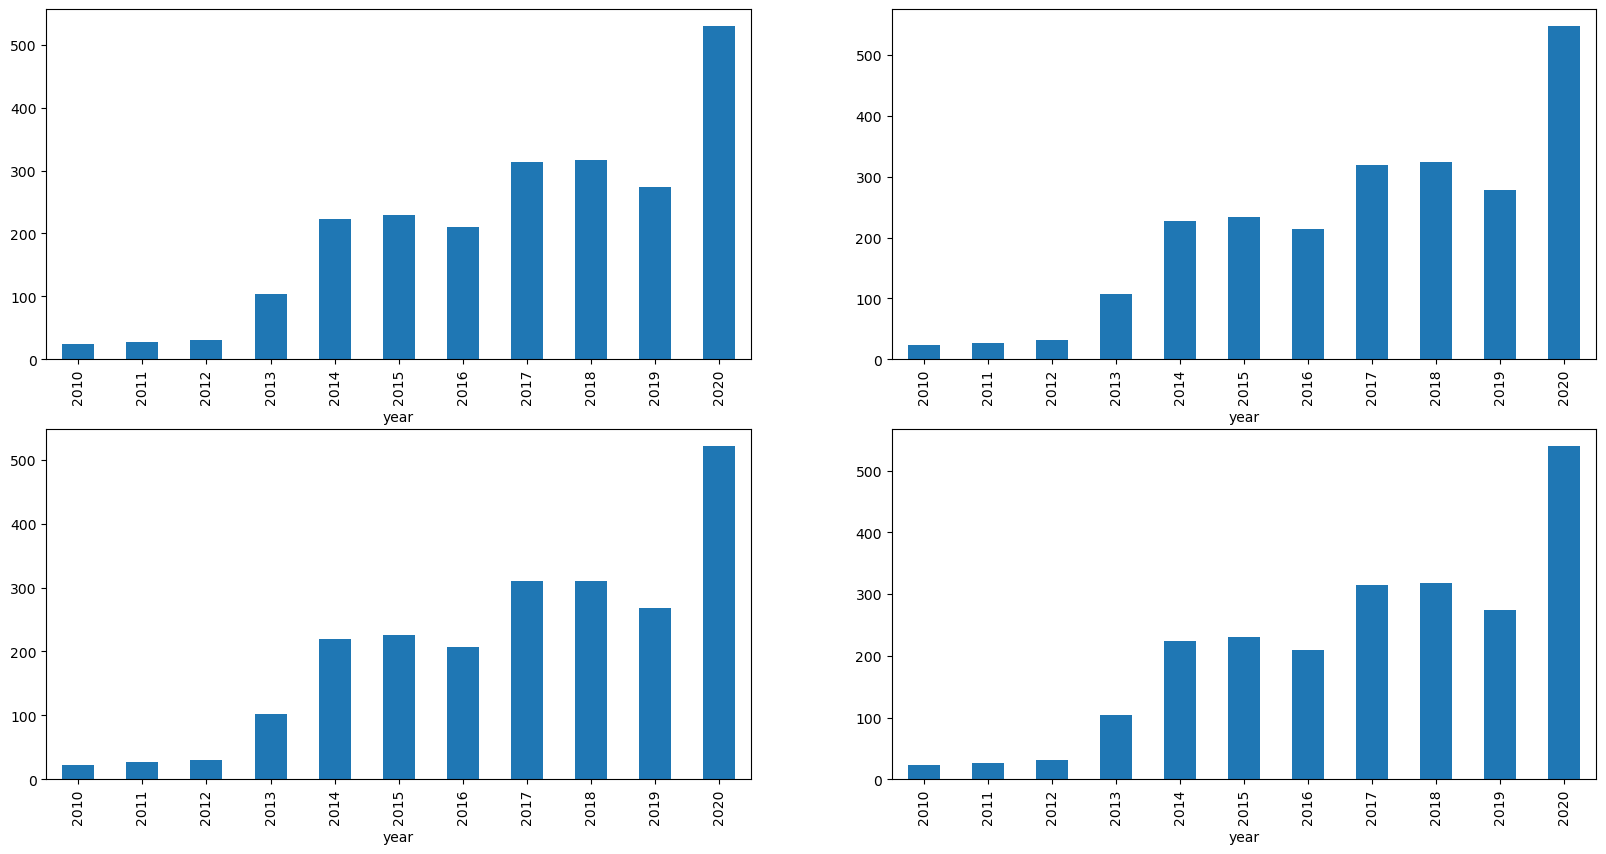

In [20]:
#this for regression (prediction)
plt.subplots(figsize=(20,10))
for i ,col in enumerate(['Open','High','Low','Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()

In above visulation , we can see that inthe year 2014 there is a double rate increasing in camparison of 2013 nd also so many changes occurs in plots.

In [21]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,185.534559,188.854147,182.229914,185.717807,5.567002e+06,6.635860,15.457794,2014.771411
1,187.778689,191.060164,184.322131,187.807339,5.584427e+06,6.664565,16.343001,2014.788146


In [22]:
#this is for classification
df['open-close']=df['Open'] - df['Close']
df['low-high'] = df['Low']-df['High']
df['target']=np.where(df['Close'].shift(-1) > df['Close'],1,0)

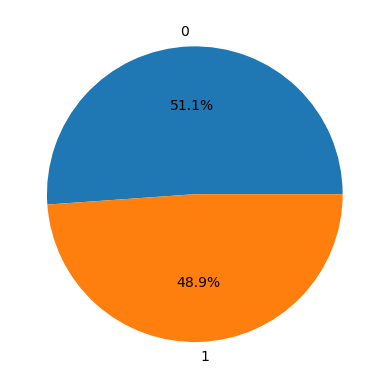

In [23]:
plt.pie(df['target'].value_counts().values, labels=[0,1], autopct='%1.1f%%')
plt.show()

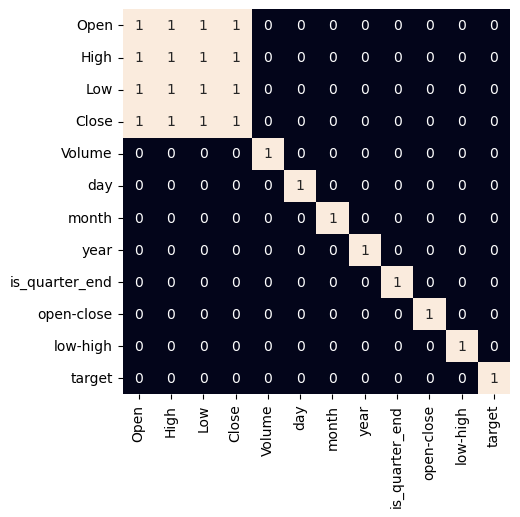

In [24]:
plt.figure(figsize=(5,5))
sb.heatmap(df.corr() > 0.9,annot = True, cbar=False)
plt.show()